In [20]:
import numpy as np
import pandas as pd

In [21]:
from ga4stpg.util import STEIN_B
from ga4stpg.graph import ReaderORLibrary
from ga4stpg.graph.util import is_steiner_tree

from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.mstcrossover import CrossoverPrimUnion
from ga4stpg.tree.generate import GenerateBasedRandomWalk
from ga4stpg.tree.mutate import ReplaceByRandomEdge, PrimBasedMutation, Prunning
from ga4stpg.tree.pxpartition import PartitionCrossoverSteinerTree

In [22]:
from ga4stpg.condition import BestKnownReached, Stagnation
from ga4stpg.customevol import GeneticEvolution as Evolution
from ga4stpg.customevol import GeneticPopulation as GPopulation
from ga4stpg.normalization import normalize
from ga4stpg.selector import roullete
from ga4stpg.tracker import DataTracker
from ga4stpg.util import STEIN_B, display, update_best, update_generation

In [23]:
from matplotlib import pyplot as plt

In [24]:
from os import path
import config

In [25]:
# import seaborn as sns
# from matplotlib import pyplot as plt 
# import numpy as np
# import pandas as pd
# from scipy import stats

In [26]:
STEIN_B

[('steinb1.txt', 82),
 ('steinb2.txt', 83),
 ('steinb3.txt', 138),
 ('steinb4.txt', 59),
 ('steinb5.txt', 61),
 ('steinb6.txt', 122),
 ('steinb7.txt', 111),
 ('steinb8.txt', 104),
 ('steinb9.txt', 220),
 ('steinb10.txt', 86),
 ('steinb11.txt', 88),
 ('steinb12.txt', 174),
 ('steinb13.txt', 165),
 ('steinb14.txt', 235),
 ('steinb15.txt', 318),
 ('steinb16.txt', 127),
 ('steinb17.txt', 131),
 ('steinb18.txt', 218)]

In [27]:
INDEX = 13

instance_problem = STEIN_B[INDEX][0]
filename = path.join(config.dataset_directory, instance_problem)
stpg = ReaderORLibrary().parser(filename)

print("STPG information", '\n', 10*'- ','\n')
print('Instance: ', stpg.name)
print('Best Known cost: ', STEIN_B[INDEX][1])
print("Nro. Node:", stpg.nro_nodes)
print("Nro. Edges:", stpg.nro_edges)
print("Nro. Terminals:", stpg.nro_terminals)
print("Terminals: \n", stpg.terminals)

STPG information 
 - - - - - - - - - -  

Instance:  B14
Best Known cost:  235
Nro. Node: 100
Nro. Edges: 125
Nro. Terminals: 25
Terminals: 
 {6, 12, 15, 16, 22, 25, 30, 39, 40, 41, 42, 43, 49, 65, 70, 71, 72, 76, 78, 79, 85, 86, 92, 96, 98}


In [28]:
generator = GenerateBasedRandomWalk(stpg)
evaluator = EvaluateTreeGraph(stpg)
crossover = CrossoverPrimUnion(stpg)
prunner   = Prunning(stpg)
mut_prim  = PrimBasedMutation(stpg)
replace_random = ReplaceByRandomEdge(stpg)

partition_cx = PartitionCrossoverSteinerTree(stpg)

In [29]:
output_data_dir = path.join("data", stpg.name)
tracker = DataTracker('001',target=output_data_dir)

In [30]:
population = (GPopulation(
        chromosomes=[ generator() for _ in range(100)],
        eval_function=evaluator,
        maximize=True)
    .evaluate()
    .normalize(norm_function=normalize)
    .callback(update_best))

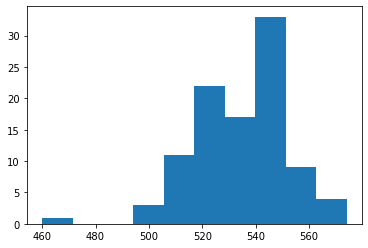

In [31]:
_costs = [x.cost for x in population]
_ = plt.hist(_costs)

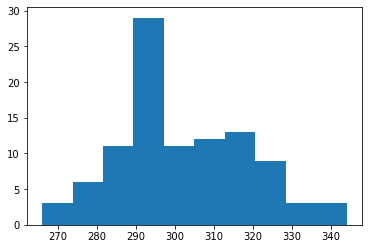

In [32]:
_costs = list()
for individual in population:
    tree = prunner(individual.chromosome)
    _cost,_ = evaluator(tree)
    _costs.append(_cost)

_ = plt.hist(_costs)

In [33]:
len(population)

100

In [34]:
# evol = (Evolution()
#         .evaluate()
#         .normalize(norm_function=normalize)
#         .callback(update_best)
#         .callback(tracker.log_evaluation)
#         .select(selection_func=roullete)
#         .crossover(combiner=crossover)
#         .mutate(mutate_function=replace_random, probability=0.2)
#         .mutate(mutate_function=mut_prim, probability=0.2)
#         .mutate(mutate_function=prunner, probability=0.2)
#         .callback(update_generation)
#         .callback(display, every=100))

In [35]:
# %%time
# result = population.evolve(evol, n=200)

In [36]:
# result.evaluate()
# _ = plt.hist([x.cost for x in result])

In [37]:
preprocessing = (Evolution().mutate(mutate_function=prunner, probability=1.0))

population = population.evolve(preprocessing,n=2)

In [38]:
evol2 = (Evolution()
        .evaluate()
        .normalize(norm_function=normalize)
        .callback(update_best)
        .callback(tracker.log_evaluation)
        .select(selection_func=roullete)
        .crossover(combiner=partition_cx)
        .mutate(mutate_function=replace_random, probability=0.3)
        # .mutate(mutate_function=mut_prim, probability=0.2)
        .mutate(mutate_function=prunner, probability=1.0)
        .callback(update_generation)
        .callback(display, every=100))

In [39]:
%%time
result2 = population.evolve(evol2, n=200)

on <{53, 78}>
Partition <{96, 78}> Partition <{40, 42}>
Random  Partition <{40, 42}>
Blue:  Partition <{48, 57}>
Red:  Partition <{53, 78}>
Red:  Partition <{48, 57}>
Partition <{96, 78}> Partition <{40, 42}>
Random  Partition <{40, 42}>
Partition <{40, 42}> Partition <{96, 78}>
Random  Partition <{96, 78}>
Partition <{96, 78}> Partition <{40, 42}>
Random  Partition <{40, 42}>
Blue:  Partition <{70, 54}>
Partition <{96, 78}> Partition <{40, 42}>
Random  Partition <{40, 42}>
Blue:  Partition <{96, 78}>
Partition <{96, 78}> Partition <{40, 42}>
Random  Partition <{40, 42}>
Partition <{40, 42}> Partition <{96, 78}>
Random  Partition <{96, 78}>
Partition <{96, 78}> Partition <{40, 42}>
Random  Partition <{96, 78}>
Red:  Partition <{40, 42}>
Red:  Partition <{56, 53}>
Partition <{40, 42}> Partition <{96, 78}>
Random  Partition <{40, 42}>
Blue:  Partition <{70, 54}>
Partition <{40, 42}> Partition <{96, 78}>
Random  Partition <{96, 78}>
Partition <{40, 42}> Partition <{96, 78}>
Random  Partit

In [40]:
result2.documented_best.cost

237